In [1]:
import tushare as ts
import time
import datetime
import sys
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
#df = Imputer().fit_transform(df)
sys.path.append('../Codes')
import DataProcessor as DP
from DataProcessor import centralize
from DataProcessor import standardize
from DataProcessor import standardize_industry
from DataProcessor import ma_ratio

In [2]:
#获取行业分类
industrys = DP.get_industrys()

In [120]:
industry='all'
industry=list(df.columns)
#取行业内股票数据
data = DP.get_daily_data(industry=industry,
                         fields=['close','adj_factor'])



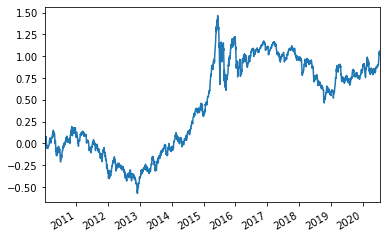

In [121]:
p = data['close'] * data['adj_factor']
r = np.log(p).diff()
r_m = r.mean(1)

i = r_m.cumsum()
i.plot()

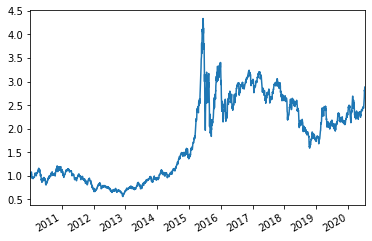

In [122]:
np.exp(i).plot()

In [125]:
r_i = r.cumsum()

In [129]:
dic = {i:r.loc[:, industrys[i]] for i in industry}

In [130]:
r_i = DataFrame({i:dic[i].mean(1) for i in dic.keys()})

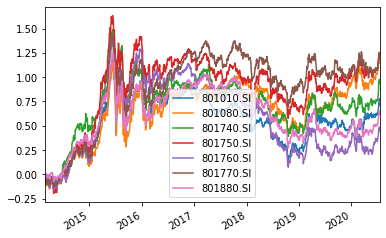

In [134]:
r_i.iloc[1000:,:].cumsum().plot()

In [5]:
turnover_rate_f = data['turnover_rate_f']

In [6]:
dic = {i:turnover_rate_f.loc[:, industrys[i]] for i in industrys.keys()}

In [114]:
del dic['801710.SI']

In [115]:
df = DataFrame({i:dic[i].median(1) for i in dic.keys()})

In [116]:
df.rolling(200).median().iloc[-1,:].sort_values(ascending=False)

801080.SI    4.280200
801770.SI    3.714700
801750.SI    3.532475
801010.SI    3.425550
801760.SI    2.853825
801740.SI    2.616750
801880.SI    2.387025
Name: 2020-07-15 00:00:00, dtype: float64

In [118]:
df.columns

Index(['801010.SI', '801080.SI', '801740.SI', '801750.SI', '801760.SI',
       '801770.SI', '801880.SI'],
      dtype='object')

In [102]:
#因子构造
OPEN = np.log(data['open'] * data['adj_factor'])
HIGH = np.log(data['high'] * data['adj_factor'])
LOW = np.log(data['low'] * data['adj_factor'])
CLOSE = np.log(data['close'] * data['adj_factor'])

trf = data['turnover_rate_f']
ltrf = np.log(trf)

mv = data['total_mv']
lmv = np.log(mv)
tmv = mv ** 3

pe = data['pe_ttm']
pb = data['pb']
ps = data['ps_ttm']
pe = 1 / pe
ps = 1 / ps
pb = 1 / pb

KeyError: 'open'

In [513]:
ror = CLOSE - CLOSE.shift()
r_rinei = CLOSE - OPEN
r_geye = OPEN - CLOSE.shift()
rh = HIGH - OPEN
rl = LOW - OPEN
hl = rh - rl
vr = ltrf - ltrf.shift()

In [514]:
n = 2
y = standardize_industry(ror.rolling(n).sum().shift(-n+1) - r_geye, industrys, industry)
y[(r_geye > 0.09).fillna(False) & (r_rinei.abs() < 1e-6).fillna(False)] = 0

In [515]:
x1 = standardize_industry(r_rinei, industrys, industry)
x2 = standardize_industry(r_rinei, industrys, industry).rolling(1).mean().shift(1)
x3 = standardize_industry(r_rinei, industrys, industry).rolling(1).mean().shift(2)
x4 = standardize_industry(r_rinei, industrys, industry).rolling(2).mean().shift(3)
x5 = standardize_industry(r_rinei, industrys, industry).rolling(5).mean().shift(5)
x6 = standardize_industry(r_rinei, industrys, industry).rolling(5).mean().shift(10)
x7 = standardize_industry(r_rinei, industrys, industry).rolling(5).mean().shift(15)

z1 = standardize_industry(r_geye, industrys, industry)
z2 = standardize_industry(r_geye, industrys, industry).rolling(1).mean().shift(1)
z3 = standardize_industry(r_geye, industrys, industry).rolling(1).mean().shift(2)
z4 = standardize_industry(r_geye, industrys, industry).rolling(2).mean().shift(3)
z5 = standardize_industry(r_geye, industrys, industry).rolling(5).mean().shift(5)
z6 = standardize_industry(r_geye, industrys, industry).rolling(5).mean().shift(10)
z7 = standardize_industry(r_geye, industrys, industry).rolling(5).mean().shift(15)

u1 = standardize_industry(ror, industrys, industry)
u2 = standardize_industry(ror, industrys, industry).rolling(1).mean().shift(1)
u3 = standardize_industry(ror, industrys, industry).rolling(1).mean().shift(2)
u4 = standardize_industry(ror, industrys, industry).rolling(2).mean().shift(3)
u5 = standardize_industry(ror, industrys, industry).rolling(5).mean().shift(5)
u6 = standardize_industry(ror, industrys, industry).rolling(5).mean().shift(10)
u7 = standardize_industry(ror, industrys, industry).rolling(5).mean().shift(15)

h1 = standardize_industry(rh, industrys, industry)
h2 = standardize_industry(rh, industrys, industry).rolling(1).mean().shift(1)
h3 = standardize_industry(rh, industrys, industry).rolling(1).mean().shift(2)
h4 = standardize_industry(rh, industrys, industry).rolling(2).mean().shift(3)
h5 = standardize_industry(rh, industrys, industry).rolling(5).mean().shift(5)
h6 = standardize_industry(rh, industrys, industry).rolling(5).mean().shift(10)
h7 = standardize_industry(rh, industrys, industry).rolling(5).mean().shift(15)

l1 = standardize_industry(rl, industrys, industry)
l2 = standardize_industry(rl, industrys, industry).rolling(1).mean().shift(1)
l3 = standardize_industry(rl, industrys, industry).rolling(1).mean().shift(2)
l4 = standardize_industry(rl, industrys, industry).rolling(2).mean().shift(3)
l5 = standardize_industry(rl, industrys, industry).rolling(5).mean().shift(5)
l6 = standardize_industry(rl, industrys, industry).rolling(5).mean().shift(10)
l7 = standardize_industry(rl, industrys, industry).rolling(5).mean().shift(15)

hl1 = standardize_industry(hl, industrys, industry)
hl2 = standardize_industry(hl, industrys, industry).rolling(1).mean().shift(1)
hl3 = standardize_industry(hl, industrys, industry).rolling(1).mean().shift(2)
hl4 = standardize_industry(hl, industrys, industry).rolling(2).mean().shift(3)
hl5 = standardize_industry(hl, industrys, industry).rolling(5).mean().shift(5)
hl6 = standardize_industry(hl, industrys, industry).rolling(5).mean().shift(10)
hl7 = standardize_industry(hl, industrys, industry).rolling(5).mean().shift(15)

vr1 = standardize_industry(vr, industrys, industry)
vr2 = standardize_industry(vr, industrys, industry).rolling(1).mean().shift(1)
vr3 = standardize_industry(vr, industrys, industry).rolling(1).mean().shift(2)
vr4 = standardize_industry(vr, industrys, industry).rolling(2).mean().shift(3)
vr5 = standardize_industry(vr, industrys, industry).rolling(5).mean().shift(5)
vr6 = standardize_industry(vr, industrys, industry).rolling(5).mean().shift(10)
vr7 = standardize_industry(vr, industrys, industry).rolling(5).mean().shift(15)

pe = standardize_industry(pe, industrys, industry)
pb = standardize_industry(pb, industrys, industry)
ps = standardize_industry(ps, industrys, industry)

mv = standardize_industry(mv, industrys, industry)
lmv = standardize_industry(lmv, industrys, industry)
tmv = standardize_industry(tmv, industrys, industry)

In [516]:
factor = {
    'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4, 'x5':x5, 'x6':x6, 'x7':x7,
    'z1':z1, 'z2':z2, 'z3':z3, 'z4':z4, 'z5':z5, 'z6':z6, 'z7':z7,
    'u1':u1, 'u2':u2, 'u3':u3, 'u4':u4, 'u5':u5, 'u6':u6, 'u7':u7,
    'h1':h1, 'h2':h2, 'h3':h3, 'h4':h4, 'h5':h5, 'h6':h6, 'h7':h7,
    'l1':l1, 'l2':l2, 'l3':l3, 'l4':l4, 'l5':l5, 'l6':l6, 'l7':l7,
    'hl1':hl1, 'hl2':hl2, 'hl3':hl3, 'hl4':hl4, 'hl5':hl5, 'hl6':hl6, 'hl7':hl7,
    'vr1':vr1, 'vr2':vr2, 'vr3':vr3, 'vr4':vr4, 'vr5':vr5, 'vr6':vr6, 'vr7':vr7,
    'pe':pe, 'pb':pb, 'ps':ps,
    'mv':mv, 'lmv':lmv, 'tmv':tmv,
}

In [517]:
begin_date = '2010-01-01'
split_date = '2018-01-01'
train_date = y.index[(begin_date < y.index) & (y.index < split_date)]
test_date = y.index[y.index > split_date]

In [518]:
df_y_train = DataFrame({'y':y.loc[train_date, :].values.flatten()})
df_x_train = DataFrame({k:factor[k].loc[train_date, :].shift().values.flatten() for k in factor.keys()})

In [519]:
df_y_test = DataFrame({'y':y.loc[test_date, :].values.flatten()})
df_x_test = DataFrame({k:factor[k].loc[test_date, :].shift().values.flatten() for k in factor.keys()})

In [520]:
df_train = pd.concat([df_y_train, df_x_train], axis=1)
df_test = pd.concat([df_y_test, df_x_test], axis=1)

In [521]:
#df_train.corr().iloc[0,:].abs().sort_values()

In [522]:
#model = smf.ols('y~lmv+u4+hl1+h5+l4+x5+hl2+x1+x2+h6+vr4+l2+u2+hl7+hl3+u5+u1', data=df_train).fit()
#model.tvalues

In [523]:
model = smf.ols('y~x1+x2\
                  +z1\
                  \
                  +h1+h2\
                  +l1+l2\
                  +lmv', data=df_train).fit()
model.tvalues

Intercept    -4.349727
x1          -15.730226
x2          -11.961423
z1            3.411819
z2            0.107005
z3           -0.295055
h1           17.465462
h2            9.158913
l1           -1.066693
l2            3.990297
lmv         -13.902431
dtype: float64

300701.SZ    0.168761
300390.SZ    0.123387
300726.SZ    0.121407
000062.SZ    0.120184
300831.SZ    0.116590
300752.SZ    0.107884
000020.SZ    0.094690
300632.SZ    0.089671
300671.SZ    0.088359
002055.SZ    0.088145
Name: 2020-07-15 00:00:00, dtype: float64


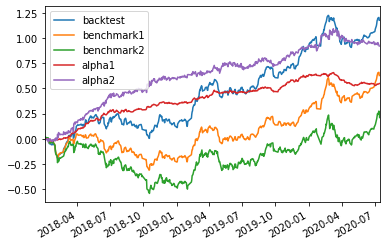

In [526]:
#调仓周期
m = 2
y_hat = DataFrame(model.predict(df_test).values.reshape(len(test_date), len(y.columns)), index=test_date, columns=y.columns)
position = (y_hat.gt(y_hat.quantile(0.9, 1), 0))

ror_test = ror.loc[test_date, :]
r_rinei_test = r_rinei.loc[test_date, :]
r_geye_test = r_geye.loc[test_date, :]

ror_huice = position * (ror_test.rolling(m).sum().shift(-m+1) - r_geye_test) / m
ror_huice[ror_huice==0] = np.nan
ror_huice.mean(1).cumsum().plot()

benchmark1 = (ror_test.rolling(m).sum().shift(-m+1) - r_geye_test) / m
benchmark1.mean(1).cumsum().plot()
benchmark2 = ror_test
benchmark2.mean(1).cumsum().plot()

alpha1 = ror_huice.mean(1).cumsum() - benchmark1.mean(1).cumsum()
alpha2 = ror_huice.mean(1).cumsum() - benchmark2.mean(1).cumsum()
alpha1.plot()
alpha2.plot()
#for i in industry:
#    stock = industrys[i]
#    ror_test.loc[:,stock].mean(1).cumsum().plot()
plt.legend(['backtest', 'benchmark1', 'benchmark2', 'alpha1', 'alpha2'] + [i for i in industry])
print(y_hat.iloc[-1,:].sort_values(ascending=False).dropna().iloc[:10])

In [525]:
position.sum(1)

2018-01-02    0
2018-01-03    5
2018-01-04    5
2018-01-05    5
2018-01-08    5
             ..
2020-07-09    5
2020-07-10    5
2020-07-13    5
2020-07-14    5
2020-07-15    5
Length: 615, dtype: int64

In [446]:
df_y_test2 = DataFrame({'y':y.loc[test_date, :].values.flatten()})
df_x_test2 = DataFrame({k:factor[k].loc[test_date, :].values.flatten() for k in factor.keys()})
df_test2 = pd.concat([df_y_test2, df_x_test2], axis=1)
y_hat2 = DataFrame(model.predict(df_test2).values.reshape(len(ror_test), len(ror_test.columns)), index=ror_test.index, columns=ror_test.columns)
print(y_hat2.iloc[-1,:].sort_values(ascending=False).dropna().iloc[:10])

000592.SZ    0.237474
002220.SZ    0.223942
603363.SH    0.145466
600195.SH    0.125628
600191.SH    0.114525
300119.SZ    0.092941
600127.SH    0.077988
600467.SH    0.071032
300268.SZ    0.064668
002868.SZ    0.062545
Name: 2020-07-15 00:00:00, dtype: float64


In [465]:
df_train = df_train.dropna()
model = RandomForestRegressor(n_estimators=10).fit(df_train.iloc[:, 1:], df_train.iloc[:, 0])
model.feature_importances_

array([0.05159753, 0.05007378, 0.04443164, 0.04619165, 0.04480049,
       0.04128151, 0.04127881, 0.05454827, 0.05270984, 0.05264996,
       0.04963717, 0.05406033, 0.04655707, 0.04854932, 0.0502602 ,
       0.0494474 , 0.04531465, 0.04479211, 0.04590302, 0.0421521 ,
       0.04376315])